In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
Cust_Attr_stat=pd.read_csv('Desktop/Customer Data/Customer Attrition Status.csv')
# print(Cust_Attr_stat.head())
# Cust_Attr_stat.dtypes

In [3]:
Cust_Demog_stat=pd.read_csv('Desktop/Customer Data/Customer Demographics.csv')
# print(Cust_Demog_stat.head())
# Cust_Demog_stat.dtypes

In [4]:
Cust_invest_snap=pd.read_csv('Desktop/Customer Data/Customer Investment Snapshot.csv')

In [5]:
Cust_portf_snap=pd.read_csv('Desktop/Customer Data/Customer Portfolio Snapshot.csv')

In [6]:
first_merge=pd.merge(Cust_Attr_stat,Cust_Demog_stat,on='CustomerId',suffixes=['_attr', '_demog'])
# print(first_merge)

In [7]:
second_merge=pd.merge(Cust_invest_snap,Cust_portf_snap,on='CustomerId',suffixes=['_invest', '_portf'])
# print(second_merge)

In [82]:
all_data=pd.merge(first_merge,second_merge,on='CustomerId')
all_data=all_data.rename(columns={'RowNumber_attr': 'RowNumber'})
all_data=all_data.drop(columns=['RowNumber_demog','RowNumber_portf','RowNumber_invest'])
# print(all_data.head())

In [83]:
all_data.columns

Index(['RowNumber', 'CustomerId', 'Exited', 'Surname', 'Geography', 'Gender',
       'Age', 'Tenure', 'CreditScore', 'Balance', 'EstimatedSalary',
       'NumOfProducts', 'HasChckng', 'IsActiveMember'],
      dtype='object')

In [84]:
all_data.describe()

,RowNumber,CustomerId,Exited,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
count,10002.000000,1.000200e+04,10002.000000,10002.000000,10002.000000,9999.00000,6385.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,5000.031794,1.569097e+07,0.203859,38.943711,5.014797,650.50075,119841.627383,100105.624356,1.530494,0.705359,0.514997
std,2886.796875,7.195055e+04,0.402886,10.612675,2.902953,96.69932,30100.935329,57515.031841,0.581967,0.455904,0.499800
min,1.000000,1.556570e+07,0.000000,18.000000,0.000000,305.00000,3768.690000,11.580000,1.000000,0.000000,0.000000
25%,2501.250000,1.562854e+07,0.000000,32.000000,3.000000,584.00000,100194.440000,51012.472500,1.000000,0.000000,0.000000
50%,4999.500000,1.569074e+07,0.000000,37.000000,5.000000,652.00000,119852.010000,100218.210000,1.000000,1.000000,1.000000
75%,7499.750000,1.575331e+07,0.000000,44.000000,7.000000,717.50000,139529.930000,149400.922500,2.000000,1.000000,1.000000
max,10000.000000,1.581569e+07,1.000000,190.000000,30.000000,865.00000,250898.090000,199992.480000,4.000000,1.000000,1.000000


In [85]:
all_data.dtypes

RowNumber            int64
CustomerId         float64
Exited             float64
Surname             object
Geography           object
Gender              object
Age                float64
Tenure             float64
CreditScore        float64
Balance            float64
EstimatedSalary    float64
NumOfProducts      float64
HasChckng          float64
IsActiveMember     float64
dtype: object

In [86]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  float64
 2   Exited           10002 non-null  float64
 3   Surname          10002 non-null  object 
 4   Geography        10002 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10002 non-null  float64
 7   Tenure           10002 non-null  float64
 8   CreditScore      9999 non-null   float64
 9   Balance          6385 non-null   float64
 10  EstimatedSalary  10002 non-null  float64
 11  NumOfProducts    10002 non-null  float64
 12  HasChckng        10002 non-null  float64
 13  IsActiveMember   10002 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.1+ MB


In [87]:
all_data.dropna(how='all')

,RowNumber,CustomerId,Exited,Surname,Geography,Gender,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
0,1,15634602.0,1.0,Hargrave,West,Female,42.0,2.0,619.0,NaN,101348.88,1.0,1.0,1.0
1,2,15647311.0,0.0,Hill,Central,Female,41.0,1.0,608.0,83807.86,112542.58,1.0,0.0,1.0
2,3,15619304.0,1.0,Onio,West,Female,42.0,8.0,502.0,159660.80,113931.57,3.0,1.0,0.0
3,4,15701354.0,0.0,Boni,West,Female,39.0,1.0,699.0,NaN,93826.63,2.0,0.0,0.0
4,5,15737888.0,0.0,Mitchell,Central,Female,43.0,2.0,850.0,125510.82,79084.10,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9996,15606229.0,0.0,Obijiaku,West,Male,39.0,5.0,771.0,NaN,96270.64,2.0,1.0,0.0
9998,9997,15569892.0,0.0,Johnstone,West,Male,35.0,10.0,516.0,57369.61,101699.77,1.0,1.0,1.0
9999,9998,15584532.0,1.0,Liu,West,Female,36.0,7.0,709.0,NaN,42085.58,1.0,0.0,1.0
10000,9999,15682355.0,1.0,Sabbatini,East,Male,42.0,3.0,772.0,75075.31,92888.52,2.0,1.0,0.0


In [88]:
all_data.isna().sum()

RowNumber             0
CustomerId            0
Exited                0
Surname               0
Geography             0
Gender                0
Age                   0
Tenure                0
CreditScore           3
Balance            3617
EstimatedSalary       0
NumOfProducts         0
HasChckng             0
IsActiveMember        0
dtype: int64

In [89]:
all_data['Balance'].fillna(0,inplace = True)
all_data['CreditScore'].fillna(method ='ffill', inplace = True)

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

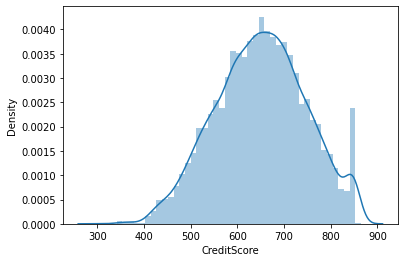

In [90]:
sns.distplot(all_data['CreditScore'],hist=True)

<AxesSubplot:xlabel='Balance', ylabel='Density'>

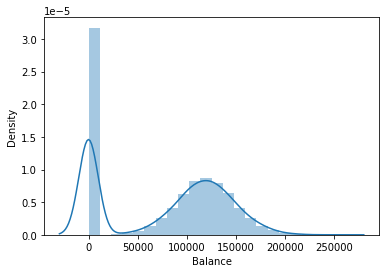

In [91]:
sns.distplot(all_data['Balance'],hist=True)

In [92]:
all_data.isna().sum()

RowNumber          0
CustomerId         0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
Tenure             0
CreditScore        0
Balance            0
EstimatedSalary    0
NumOfProducts      0
HasChckng          0
IsActiveMember     0
dtype: int64

In [93]:
all_data.tail(10)

,RowNumber,CustomerId,Exited,Surname,Geography,Gender,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
9992,9991,15798964.0,0.0,Nkemakonam,East,Male,33.0,3.0,714.0,35016.60,53667.08,1.0,1.0,0.0
9993,9992,15769959.0,1.0,Ajuluchukwu,West,Female,53.0,4.0,597.0,88381.21,69384.71,1.0,1.0,0.0
9994,9993,15657105.0,0.0,Chukwualuka,Central,Male,36.0,2.0,726.0,0.00,195192.40,1.0,1.0,0.0
9995,9994,15569266.0,0.0,Rahman,West,Male,28.0,7.0,644.0,155060.41,29179.52,1.0,1.0,0.0
9996,9995,15719294.0,0.0,Wood,West,Female,29.0,2.0,800.0,0.00,167773.55,2.0,0.0,0.0
9997,9996,15606229.0,0.0,Obijiaku,West,Male,39.0,5.0,771.0,0.00,96270.64,2.0,1.0,0.0
9998,9997,15569892.0,0.0,Johnstone,West,Male,35.0,10.0,516.0,57369.61,101699.77,1.0,1.0,1.0
9999,9998,15584532.0,1.0,Liu,West,Female,36.0,7.0,709.0,0.00,42085.58,1.0,0.0,1.0
10000,9999,15682355.0,1.0,Sabbatini,East,Male,42.0,3.0,772.0,75075.31,92888.52,2.0,1.0,0.0
10001,10000,15628319.0,0.0,Walker,West,Female,28.0,4.0,792.0,130142.79,38190.78,1.0,1.0,0.0


In [94]:
duplicate = all_data[all_data.duplicated(['CustomerId', 'Surname'])]
# print(duplicate)
all_data.shape

(10002, 14)

In [95]:
all_data.drop_duplicates(keep='first',inplace=True)
all_data.shape

(10000, 14)

In [96]:
all_data.skew(axis = 1, skipna = True)

0        3.316373
1        3.316193
2        3.315777
3        3.316411
4        3.316145
           ...   
9997     3.316399
9998     3.316325
9999     3.316581
10000    3.316321
10001    3.316207
Length: 10000, dtype: float64

In [97]:
all_data['Gender'].unique()

array(['Female', 'Male', 'Neutral'], dtype=object)

In [98]:
all_data.Gender.value_counts()

Male       5453
Female     4539
Neutral       8
Name: Gender, dtype: int64

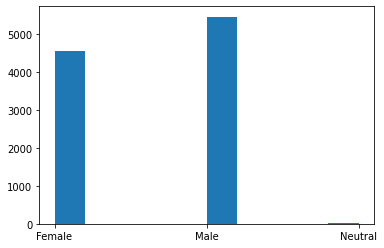

In [99]:
plt.hist(all_data['Gender'])
plt.show()

In [100]:
all_data.Geography.value_counts()

West       5014
East       2509
Central    2477
Name: Geography, dtype: int64

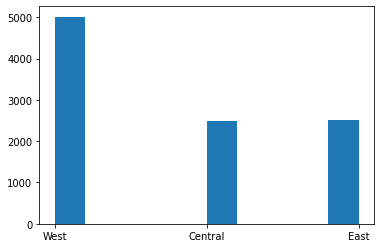

In [101]:
plt.hist(all_data['Geography'])
plt.show()

In [102]:
all_data.corr()

,RowNumber,CustomerId,Exited,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
RowNumber,1.000000,0.004202,-0.016571,-0.000440,-0.008020,0.006868,-0.009067,-0.005988,0.007246,0.000599,0.012044
CustomerId,0.004202,1.000000,-0.006248,0.008627,-0.015261,0.005910,-0.012419,0.015271,0.016972,-0.014025,0.001665
Exited,-0.016571,-0.006248,1.000000,0.280904,-0.012178,-0.027609,0.118533,0.012097,-0.047820,-0.007138,-0.156128
Age,-0.000440,0.008627,0.280904,1.000000,-0.009025,-0.004027,0.025466,-0.009181,-0.028665,-0.013279,0.082351
Tenure,-0.008020,-0.015261,-0.012178,-0.009025,1.000000,-0.002227,-0.011655,0.008055,0.017197,0.023078,-0.029180
CreditScore,0.006868,0.005910,-0.027609,-0.004027,-0.002227,1.000000,0.007027,-0.002511,0.012281,-0.005874,0.025745
Balance,-0.009067,-0.012419,0.118533,0.025466,-0.011655,0.007027,1.000000,0.012797,-0.304180,-0.014858,-0.010084
EstimatedSalary,-0.005988,0.015271,0.012097,-0.009181,0.008055,-0.002511,0.012797,1.000000,0.014204,-0.009933,-0.011421
NumOfProducts,0.007246,0.016972,-0.047820,-0.028665,0.017197,0.012281,-0.304180,0.014204,1.000000,0.003183,0.009612
HasChckng,0.000599,-0.014025,-0.007138,-0.013279,0.023078,-0.005874,-0.014858,-0.009933,0.003183,1.000000,-0.011866


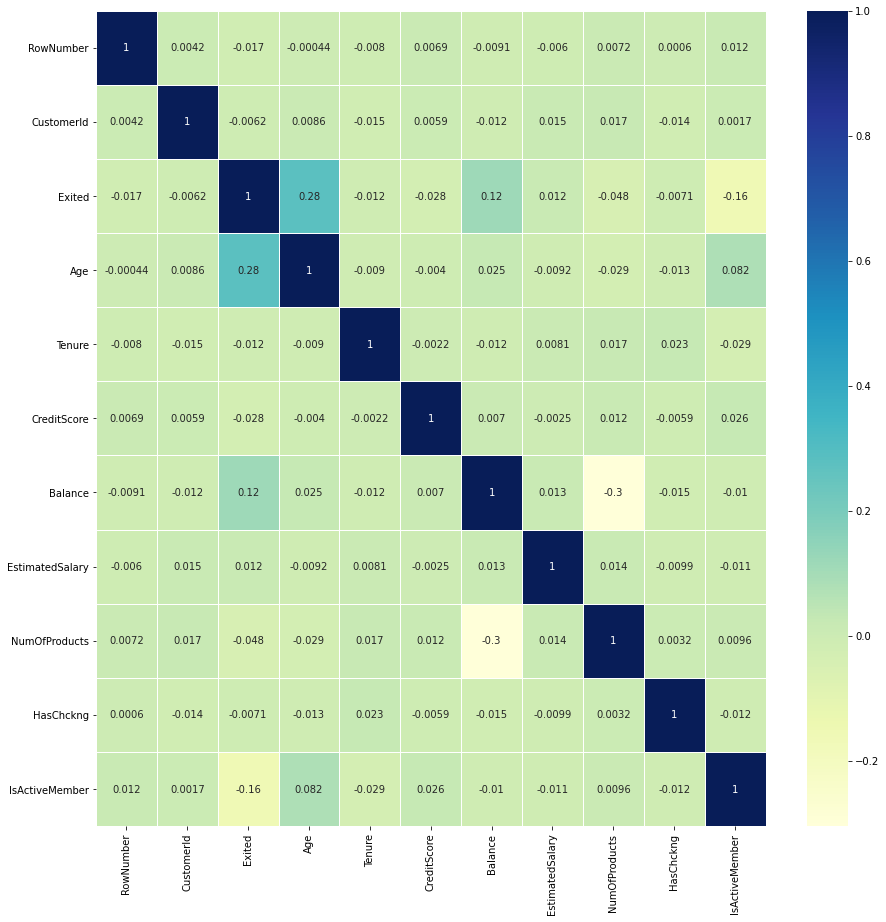

In [135]:
plt.figure(figsize = (15, 15))
corr = all_data.corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True,linewidths = 0.5,)
plt.show()

In [163]:
#rowcount of each area
filtereddata=all_data.groupby('Geography').RowNumber.count().reset_index()
filtereddata

,Geography,RowNumber
0,Central,2477
1,East,2509
2,West,5014


In [179]:
filtereddata1=all_data.groupby(['Geography','Exited']).RowNumber.count().reset_index()
filtereddata1.pivot(columns='Geography',index='Exited',values='RowNumber').reset_index(inplace=True)
print(filtereddata1)

  Geography  Exited  RowNumber
0   Central       0       2064
1   Central       1        413
2      East       0       1695
3      East       1        814
4      West       0       4204
5      West       1        810


In [174]:
#  maximum tenure of customer at each area

all_data.groupby('Geography').Tenure.max() 

Geography
Central    10
East       30
West       10
Name: Tenure, dtype: int64

<AxesSubplot:xlabel='Geography'>

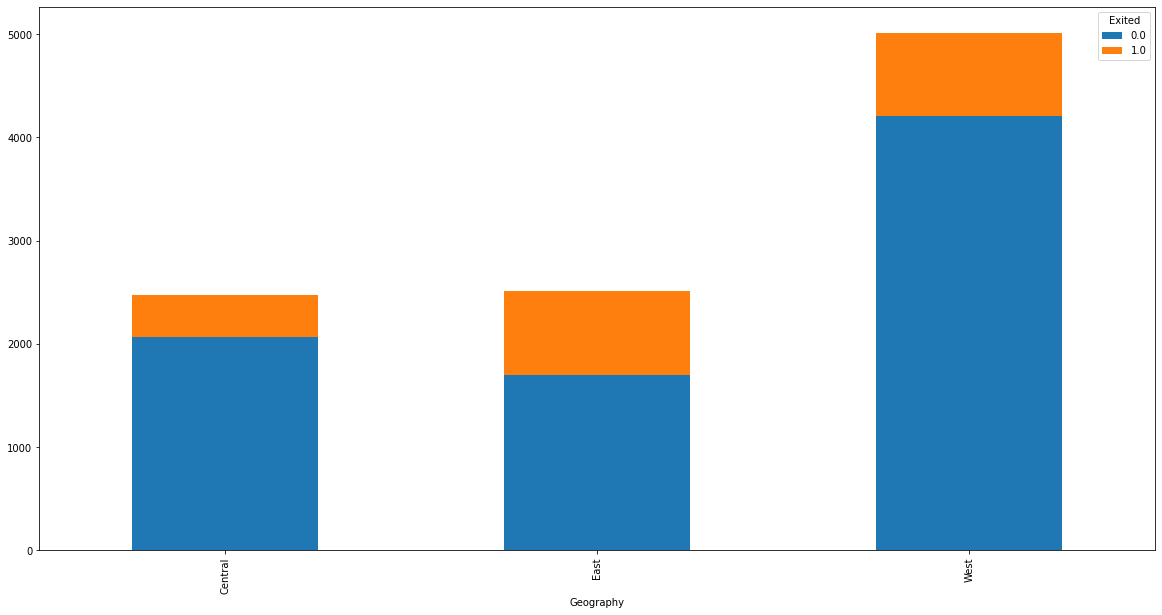

In [103]:
# exited vs geography
all_data.groupby(["Geography", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 

<AxesSubplot:xlabel='Geography,Gender'>

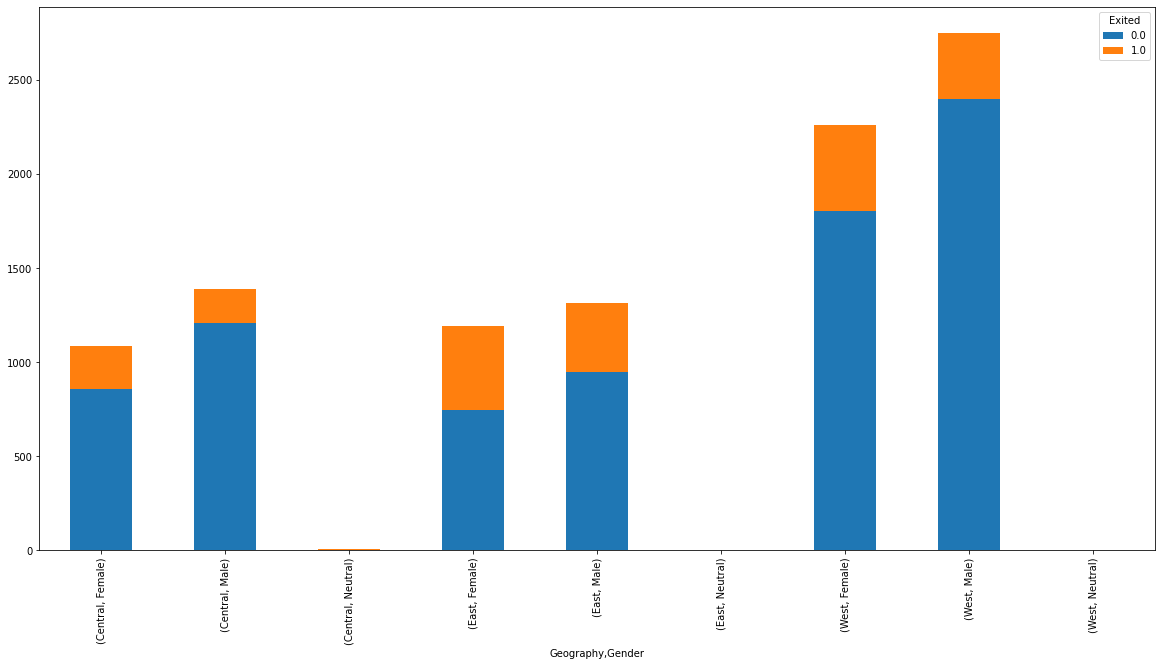

In [104]:
# based on Gender+Geography
all_data.groupby(["Geography","Gender", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

In [105]:
all_data = all_data.astype({"CustomerId":'int', "Exited":'int',"IsActiveMember":'int',"NumOfProducts":'int',"Age":'int',"Tenure":'int','HasChckng':'int','IsActiveMember':'int','Gender':"string","Surname":"string","Geography":"string","CreditScore":'int'}) 
all_data.dtypes

RowNumber            int64
CustomerId           int64
Exited               int64
Surname             string
Geography           string
Gender              string
Age                  int64
Tenure               int64
CreditScore          int64
Balance            float64
EstimatedSalary    float64
NumOfProducts        int64
HasChckng            int64
IsActiveMember       int64
dtype: object

In [182]:
filterdata1=all_data.groupby(["Geography","Gender", "Exited"]).size().unstack()
filterdata1
# conclusion-many females have exited their geographical area

Exited                  0      1
Geography Gender                
Central   Female    856.0  229.0
          Male     1206.0  181.0
          Neutral     2.0    3.0
East      Female    745.0  448.0
          Male      950.0  365.0
          Neutral     NaN    1.0
West      Female   1801.0  460.0
          Male     2401.0  350.0
          Neutral     2.0    NaN

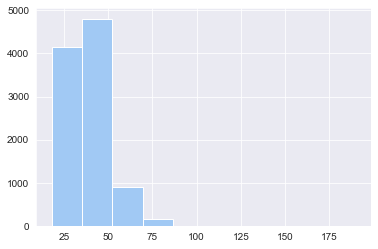

In [274]:
plt.hist(all_data['Age'])
plt.show()

In [278]:
all_data[['Exited','Age']].groupby('Exited').median()
# older ppl have exited more

,Age
Exited,
0,36.0
1,45.0


In [107]:
# total no of IsActiveMember 
all_data.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

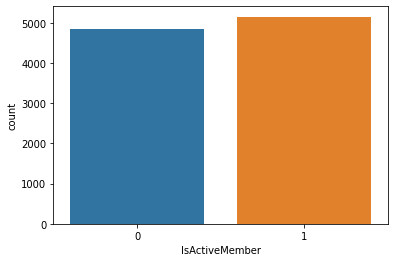

In [191]:
sns.countplot(all_data["IsActiveMember"])

In [200]:
# total no of ActiveMember and non active members in different zones
group_by_active = all_data.groupby(['Geography','IsActiveMember'])
count_active_by_geo = group_by_active.size().unstack()
count_active_by_geo

IsActiveMember,0,1
Geography,,
Central,1165,1312
East,1261,1248
West,2423,2591


<AxesSubplot:ylabel='Geography'>

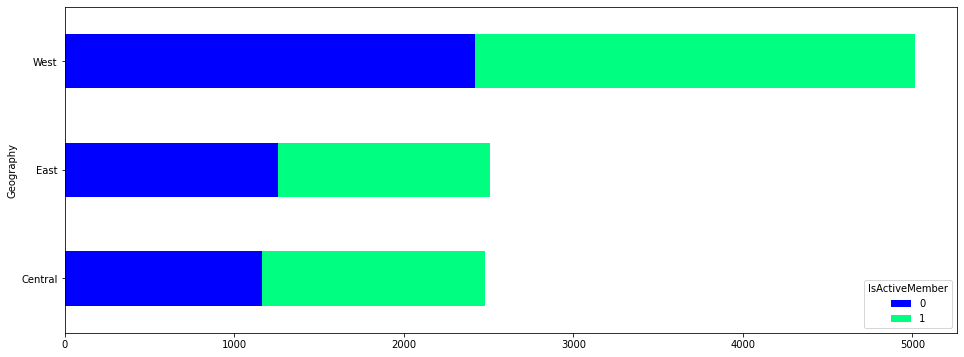

In [109]:
count_active_by_geo.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

In [222]:
# all_data['Tenure'].interpolate(method ='linear', limit_direction ='forward')
tenure= all_data.pivot_table(index='CustomerId', columns='Geography', values='Tenure')
tenure

Geography,Central,East,West
CustomerId,,,
15565701,9.0,NaN,NaN
15565706,1.0,NaN,NaN
15565714,NaN,NaN,1.0
15565779,NaN,6.0,NaN
15565796,NaN,10.0,NaN
...,...,...,...
15815628,NaN,NaN,8.0
15815645,NaN,NaN,8.0
15815656,NaN,9.0,NaN


In [113]:
all_data.head()

,RowNumber,CustomerId,Exited,Surname,Geography,Gender,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
0,1,15634602,1,Hargrave,West,Female,42,2,619,0.00,101348.88,1,1,1
1,2,15647311,0,Hill,Central,Female,41,1,608,83807.86,112542.58,1,0,1
2,3,15619304,1,Onio,West,Female,42,8,502,159660.80,113931.57,3,1,0
3,4,15701354,0,Boni,West,Female,39,1,699,0.00,93826.63,2,0,0
4,5,15737888,0,Mitchell,Central,Female,43,2,850,125510.82,79084.10,1,1,1


In [283]:
filterdata3=all_data.groupby(all_data.apply(lambda row:row['HasChckng']==1 & row['Exited']==1 & row['IsActiveMember']==1,axis=1)).size()
filterdata3
# conclusion-total 482 active customers have exited while having deposit account

False    9518
True      482
dtype: int64

<AxesSubplot:xlabel='Balance', ylabel='Density'>

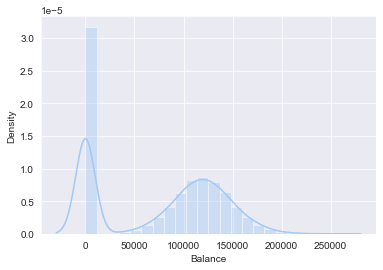

In [271]:
sns.distplot(all_data.Balance)
# conclusion- many customers have low balance

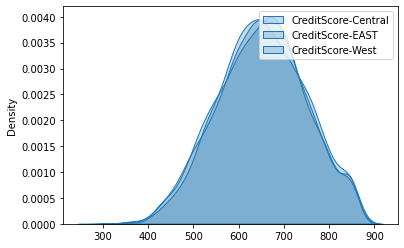

In [216]:
all_data_credit_west=all_data[all_data['Geography']=='West']['CreditScore'].values
all_data_credit_central=all_data[all_data['Geography']=='Central']['CreditScore'].values
all_data_credit_east=all_data[all_data['Geography']=='East']['CreditScore'].values
dfeast=pd.DataFrame(all_data_credit_east)
dfwest=pd.DataFrame(all_data_credit_west)
dfcentral=pd.DataFrame(all_data_credit_central)
sns.kdeplot(data=dfcentral, shade=True, label="CreditScore-Central")
sns.kdeplot(data=dfeast, shade=True, label="CreditScore-EAST")
sns.kdeplot(data=dfwest, shade=True, label="CreditScore-West")
plt.legend()
plt.show()

In [262]:
# comparing tenure area wise
df1=all_data[all_data['Geography']=='West']['Tenure'].max()
df2=all_data[all_data['Geography']=='East']['Tenure'].max()
df3=all_data[all_data['Geography']=='Central']['Tenure'].max()
print(df1)
print(df2)
print(df3)

# conclusion- east has served the max tenure with a customer 

10
30
10


In [265]:
all_data.head()

,RowNumber,CustomerId,Exited,Surname,Geography,Gender,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
0,1,15634602,1,Hargrave,West,Female,42,2,619,0.00,101348.88,1,1,1
1,2,15647311,0,Hill,Central,Female,41,1,608,83807.86,112542.58,1,0,1
2,3,15619304,1,Onio,West,Female,42,8,502,159660.80,113931.57,3,1,0
3,4,15701354,0,Boni,West,Female,39,1,699,0.00,93826.63,2,0,0
4,5,15737888,0,Mitchell,Central,Female,43,2,850,125510.82,79084.10,1,1,1


In [266]:
all_data_final=all_data.reindex(columns=['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasChckng','IsActiveMember','EstimatedSalary','Exited'])

In [267]:
all_data_final.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,West,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Central,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,West,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,West,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Central,Female,43,2,125510.82,1,1,1,79084.10,0
